## Face make Detection Project

## Model Training

### Import Relevent Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import tensorflow as tf
import keras


from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

import argparse
from imutils import paths
import sys
import os

In [2]:
# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-d", "--dataset", required=True,
	help="path to input dataset")
ap.add_argument("-p", "--plot", type=str, default="plot.png",
	help="path to output loss/accuracy plot")
ap.add_argument("-m", "--model", type=str,
	default="mask_detectorch.model",
	help="path to output face mask detector model")
args = vars(ap.parse_args())

usage: ipykernel_launcher.py [-h] -d DATASET [-p PLOT] [-m MODEL]
ipykernel_launcher.py: error: the following arguments are required: -d/--dataset


SystemExit: 2

## Data Collection

### Grab the list of images from dataset -> Segregate into 
### 1. List of data(images) & 
### 2. Class of images 

In [3]:
args = {
    "dataset": "C:\Priya learning path\Hope_Artifiacial_Intelligence\Deep Learning\Face Mask Detection Project\dataset" 
}
 # Replace with the actual dataset path

In [4]:
imagepaths = list(paths.list_images(args['dataset'])) 
data = []                  # Input - Images as Vectors
labels = []                # Output - 2 Classes

In [5]:
imagepaths

['C:\\Priya learning path\\Hope_Artifiacial_Intelligence\\Deep Learning\\Face Mask Detection Project\\dataset\\without_mask\\0.jpg',
 'C:\\Priya learning path\\Hope_Artifiacial_Intelligence\\Deep Learning\\Face Mask Detection Project\\dataset\\without_mask\\0_0_aidai_0014.jpg',
 'C:\\Priya learning path\\Hope_Artifiacial_Intelligence\\Deep Learning\\Face Mask Detection Project\\dataset\\without_mask\\0_0_aidai_0029.jpg',
 'C:\\Priya learning path\\Hope_Artifiacial_Intelligence\\Deep Learning\\Face Mask Detection Project\\dataset\\without_mask\\0_0_aidai_0043.jpg',
 'C:\\Priya learning path\\Hope_Artifiacial_Intelligence\\Deep Learning\\Face Mask Detection Project\\dataset\\without_mask\\0_0_aidai_0074.jpg',
 'C:\\Priya learning path\\Hope_Artifiacial_Intelligence\\Deep Learning\\Face Mask Detection Project\\dataset\\without_mask\\0_0_aidai_0084.jpg',
 'C:\\Priya learning path\\Hope_Artifiacial_Intelligence\\Deep Learning\\Face Mask Detection Project\\dataset\\without_mask\\0_0_aidai_01

### Loop over the imagepath

In [6]:
for imagepath in imagepaths:
    
    # Extract all the class names  from filename (with_mask & without_mask)
    label = imagepath.split(os.path.sep)[-2] 
    print('Class:',label)
    
    # Load the input image (224*224) & preprocess it
    image = load_img(imagepath, target_size= (224,224))     # Just Loading Image
    image = img_to_array(image)                             # Matrix format -> Array format (Numbers)
    image = preprocess_input(image)                         # Preprocessing based on PreTrained Model - MobileNetV2

    # update the data and labels lists, respectively
    data.append(image)
    labels.append(label)

Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask
Class: without_mask


### Convert data & labels -> NumPy Array

In [7]:
data = np.array(data, dtype='float32')
labels = np.array(labels)

In [8]:
data.shape

(3846, 224, 224, 3)

In [9]:
data

array([[[[-0.94509804, -0.9764706 , -0.85882354],
         [-0.94509804, -0.9764706 , -0.85882354],
         [-0.94509804, -0.9764706 , -0.85882354],
         ...,
         [-0.8509804 , -0.90588236, -0.78039217],
         [-0.8509804 , -0.90588236, -0.78039217],
         [-0.84313726, -0.8980392 , -0.77254903]],

        [[-0.9137255 , -0.94509804, -0.827451  ],
         [-0.9137255 , -0.94509804, -0.827451  ],
         [-0.9137255 , -0.94509804, -0.827451  ],
         ...,
         [-0.7490196 , -0.8039216 , -0.6784314 ],
         [-0.7490196 , -0.8039216 , -0.6784314 ],
         [-0.7411765 , -0.79607844, -0.67058825]],

        [[-0.92156863, -0.9607843 , -0.8039216 ],
         [-0.92156863, -0.9529412 , -0.81960785],
         [-0.92156863, -0.9607843 , -0.8039216 ],
         ...,
         [-0.88235295, -0.8980392 , -0.7882353 ],
         [-0.85882354, -0.8901961 , -0.77254903],
         [-0.85882354, -0.8745098 , -0.7647059 ]],

        ...,

        [[ 0.38823533, -0.9607843 , -0

In [10]:
labels.shape

(3846,)

In [11]:
labels

array(['without_mask', 'without_mask', 'without_mask', ..., 'with_mask',
       'with_mask', 'with_mask'], dtype='<U12')

### Perform Onehot Encoding Method

In [12]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [13]:
labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

## Train & Test Split 

In [14]:
x_train,x_test,y_train,y_test = train_test_split(data,labels, test_size=0.2, random_state=42, stratify=labels)

### Construct the training image generator for data augmentation

In [15]:
aug = ImageDataGenerator(
    rotation_range = 20,
    zoom_range = 0.15,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.15,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

## Pre Trained Model -> MobileNetV2 - Transfer Learning 

In [16]:
basemodel = MobileNetV2(weights = 'imagenet',                     # the path to the weights file to be loaded
                        include_top = False,                      # whether to include the fully connected layer at the top of the network
                        input_tensor = Input(shape=(224,224,3)))  # image shape

### Construct the head of the model that will be placed on top of the base model

In [17]:
headmodel = basemodel.output
headmodel = MaxPooling2D(pool_size = (7,7))(headmodel)
headmodel = Flatten()(headmodel)
headmodel = Dense(128, activation = 'relu')(headmodel)
headmodel = Dropout(0.5)(headmodel)
headmodel = Dense(2, activation = 'Softmax')(headmodel)

In [18]:
headmodel

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_1')>

### Place the headmodel on top of the basemodel (this will become the actual model we will train)

In [19]:
model = Model(inputs = basemodel.input, outputs = headmodel)

### Loop over all layers in the basemodel and freeze them so they will *NOT* be updated during the first training process

In [20]:
for layer in basemodel.layers:
    layer.trainable = False

## Model Compile

In [21]:
model.compile (optimizer = 'adam',    
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# Adam optimization is a stochastic gradient descent method based on adaptive estimation of first-order and second-order moments.
# binary_crossentropy -> Computes the cross-entropy loss between true labels and predicted labels.

## Training the headmodel - Creating AI Brain for our model based on Pre-trained model

In [22]:
epoch = 20
batch_size = 32

In [23]:
Model = model.fit(
    aug.flow(x_train, y_train, batch_size),
    steps_per_epoch = len(x_train) // batch_size,   # Number of batches of training data per epoch.
    validation_data = (x_test, y_test),
    validation_steps = len(x_test) // batch_size,   # Number of batches of validation data during evaluation.
    epochs = epoch
)

# When your dataset is large and cannot fit into memory that time we can try like this.
# When applying data augmentation during training

Epoch 1/20
96/96 [==============================] - 151s 2s/step - loss: 0.7420 - accuracy: 0.8827 - val_loss: 0.0626 - val_accuracy: 0.9792
Epoch 2/20
96/96 [==============================] - 130s 1s/step - loss: 0.1007 - accuracy: 0.9662 - val_loss: 0.0455 - val_accuracy: 0.9844
Epoch 3/20
96/96 [==============================] - 139s 1s/step - loss: 0.0835 - accuracy: 0.9694 - val_loss: 0.0705 - val_accuracy: 0.9649
Epoch 4/20
96/96 [==============================] - 136s 1s/step - loss: 0.0746 - accuracy: 0.9760 - val_loss: 0.0472 - val_accuracy: 0.9818
Epoch 5/20
96/96 [==============================] - 125s 1s/step - loss: 0.0663 - accuracy: 0.9760 - val_loss: 0.0426 - val_accuracy: 0.9844
Epoch 6/20
96/96 [==============================] - 115s 1s/step - loss: 0.0638 - accuracy: 0.9750 - val_loss: 0.0332 - val_accuracy: 0.9870
Epoch 7/20
96/96 [==============================] - 115s 1s/step - loss: 0.0721 - accuracy: 0.9731 - val_loss: 0.0361 - val_accuracy: 0.9870
Epoch 8/20
96

## Prediction

In [24]:
y_pred = model.predict(x_test, batch_size)

25/25 [==============================] - 22s 818ms/step


### For each image in the testing set we need to find the index of the label with the corresponding largest predicted probability

In [28]:
y_pred_index = np.argmax(y_pred, axis = 1)
y_pred_index

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [29]:
y_test_index = np.argmax(y_test, axis=1)
y_test_index

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

### Confusion Matrix

In [30]:
cm = confusion_matrix(y_test_index, y_pred_index)
cm

array([[383,   1],
       [  6, 380]], dtype=int64)

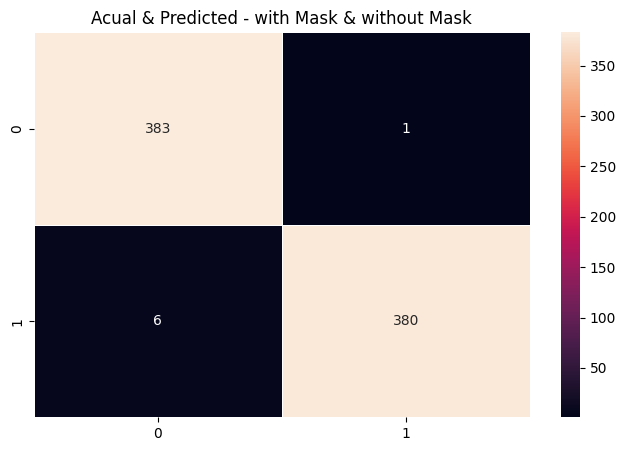

In [31]:
plt.figure(figsize=(8,5))
sb.heatmap(cm, annot=True, fmt='d', linewidth = 0.6)
plt.title("Acual & Predicted - with Mask & without Mask")
plt.show()

### Classification Report

In [32]:
report = classification_report(y_test_index, y_pred_index, target_names = lb.classes_)
print(report)

              precision    recall  f1-score   support

   with_mask       0.98      1.00      0.99       384
without_mask       1.00      0.98      0.99       386

    accuracy                           0.99       770
   macro avg       0.99      0.99      0.99       770
weighted avg       0.99      0.99      0.99       770



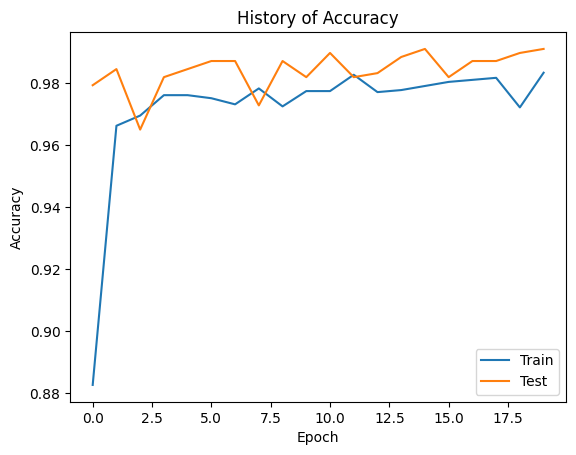

In [33]:
plt.plot(Model.history['accuracy'])
plt.plot(Model.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('History of Accuracy')
plt.legend(['Train','Test'], loc='best')
plt.show()

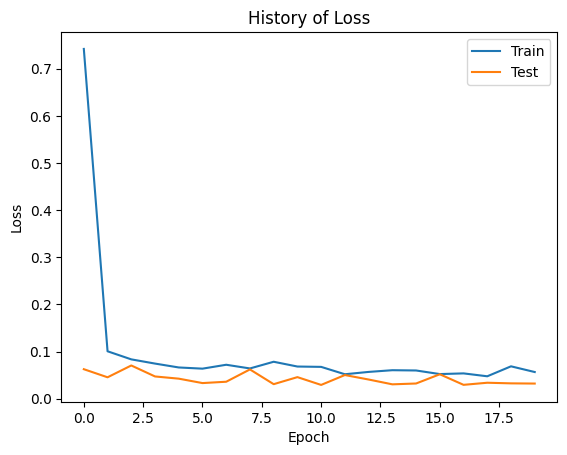

In [34]:
plt.plot(Model.history['loss'])
plt.plot(Model.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('History of Loss')
plt.legend(['Train','Test'], loc='best')
plt.show()

## Save the Best Model

In [35]:
import os
import subprocess
from keras.models import load_model

# Step 1: Define the folder path
folder_path = r'C:\Priya learning path\Hope_Artifiacial_Intelligence\Deep Learning\Face Mask Detection Project'

# Step 2: Remove the read-only attribute
try:
    subprocess.run(f'attrib -r "{folder_path}" /s /d', shell=True)
    print("Read-only attribute removed from the folder.")
except Exception as e:
    print(f"Failed to change folder properties: {e}")

# Step 3: Save the model
try:
    model.save(os.path.join(folder_path, 'face_mask_model.h5'))
    print("Model saved successfully.")
except Exception as e:
    print(f"Failed to save the model: {e}")


Read-only attribute removed from the folder.
Model saved successfully.
